In [173]:
# importing all the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

In [2]:
# Reading csv file
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [3]:
#checking data head
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [5]:
#Checking dataset shape.
df.shape

(908, 25)

* There are 908 rows and 25 columns

In [6]:
#Cheking dataset null value
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [5]:
#getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

* There are float64(13), object(12) types of data in dataset

In [6]:
#describing dataset
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


* There are some null values in the dataset

## Data Preprocessing

In [8]:
#Dropping the columns which are having null values more than 60% of the data
df.drop(columns=['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [9]:
#checking head
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


In [10]:
#checking shape
df.shape

(908, 19)

In [12]:
#Filling the NaN values of categorical columns
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])
df['generation_data_source']=df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

In [13]:
#filling the NaN values of continous column
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

In [15]:
#converting float data columns
df['commissioning_year']=df['commissioning_year'].astype(object)
df['year_of_capacity_data']=df['year_of_capacity_data'].astype(object)

In [16]:
#getting information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 908 non-null    object 
 1   country_long            908 non-null    object 
 2   name                    908 non-null    object 
 3   gppd_idnr               908 non-null    object 
 4   capacity_mw             908 non-null    float64
 5   latitude                908 non-null    float64
 6   longitude               908 non-null    float64
 7   primary_fuel            908 non-null    object 
 8   commissioning_year      908 non-null    object 
 9   source                  908 non-null    object 
 10  url                     908 non-null    object 
 11  geolocation_source      908 non-null    object 
 12  year_of_capacity_data   908 non-null    object 
 13  generation_gwh_2013     908 non-null    float64
 14  generation_gwh_2014     908 non-null    fl

In [17]:
#checking head
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2013.0,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority


In [19]:
#droping some columns which is not nessesory
df.drop(columns=['country','country_long','name','gppd_idnr','source','url','geolocation_source','generation_data_source'],axis=1,inplace=True)

In [20]:
#checking head
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,2011.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,Coal,2013.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,Wind,2013.0,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,Gas,2004.0,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,2015.0,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736


In [21]:
#spliting year data and the commisioning year
df['commissioning_year']=df['year_of_capacity_data']-df['commissioning_year']

In [22]:
#droping year of capacity data which is not requiered
df.drop(columns=['year_of_capacity_data'],axis=1,inplace=True)

In [23]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,7.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,Coal,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,Wind,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,Gas,14.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,3.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,2.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,Wind,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,Coal,5.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [24]:
#checking shape
df.shape

(908, 10)

In [25]:
#checking infromation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    object 
 5   generation_gwh_2013  908 non-null    float64
 6   generation_gwh_2014  908 non-null    float64
 7   generation_gwh_2015  908 non-null    float64
 8   generation_gwh_2016  908 non-null    float64
 9   generation_gwh_2017  908 non-null    float64
dtypes: float64(8), object(2)
memory usage: 71.1+ KB


In [26]:
#describing dataset
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


* There is no missing values in dataset
* There are many skewness in dataset
* There is a large difference in mean and standard deviation

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

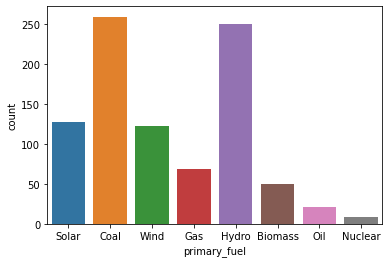

In [27]:
#ploting for catagorical data
sns.countplot(df['primary_fuel'])

In [28]:
#converting data from label encoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
lab_enc=lab_enc.fit_transform(df['primary_fuel'])
df['primary_fuel']=lab_enc

In [29]:
#converting data from label enoder
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
lab_enc=lab_enc.fit_transform(df['commissioning_year'])
df['commissioning_year']=lab_enc

In [30]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,7,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,5,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,5,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,14,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,3,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,5,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,7,5,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,1,5,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


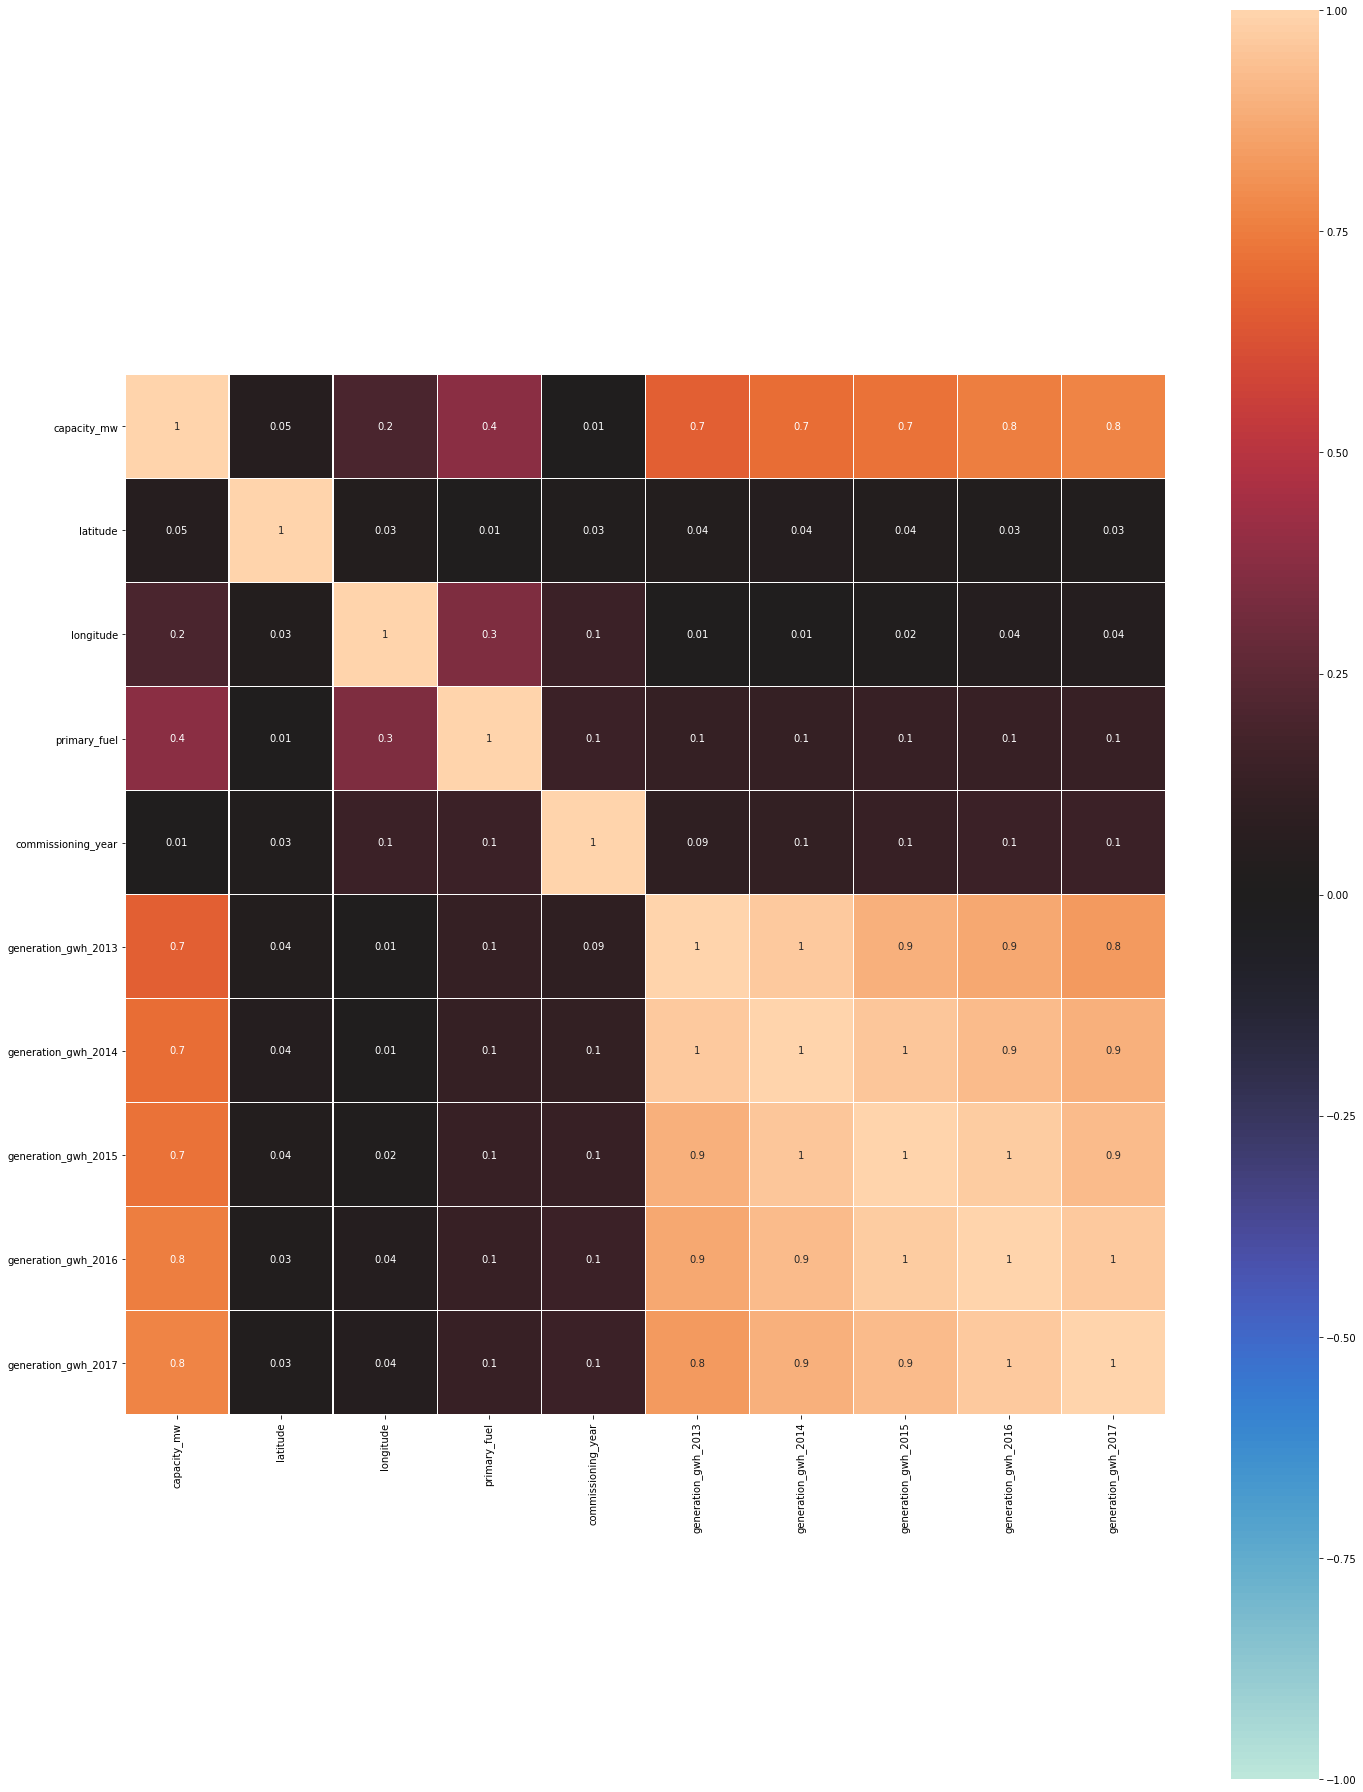

In [32]:
#ploting heatmap
df_corr=df.corr().abs()
plt.figure(figsize=(20,25))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=0.2)
plt.tight_layout()

* The label is highly corelated with generation of power in differant years and very less corelated with commission year
* Multi collinearity exists with some columns 
* In some columns there is a 100% collinearity

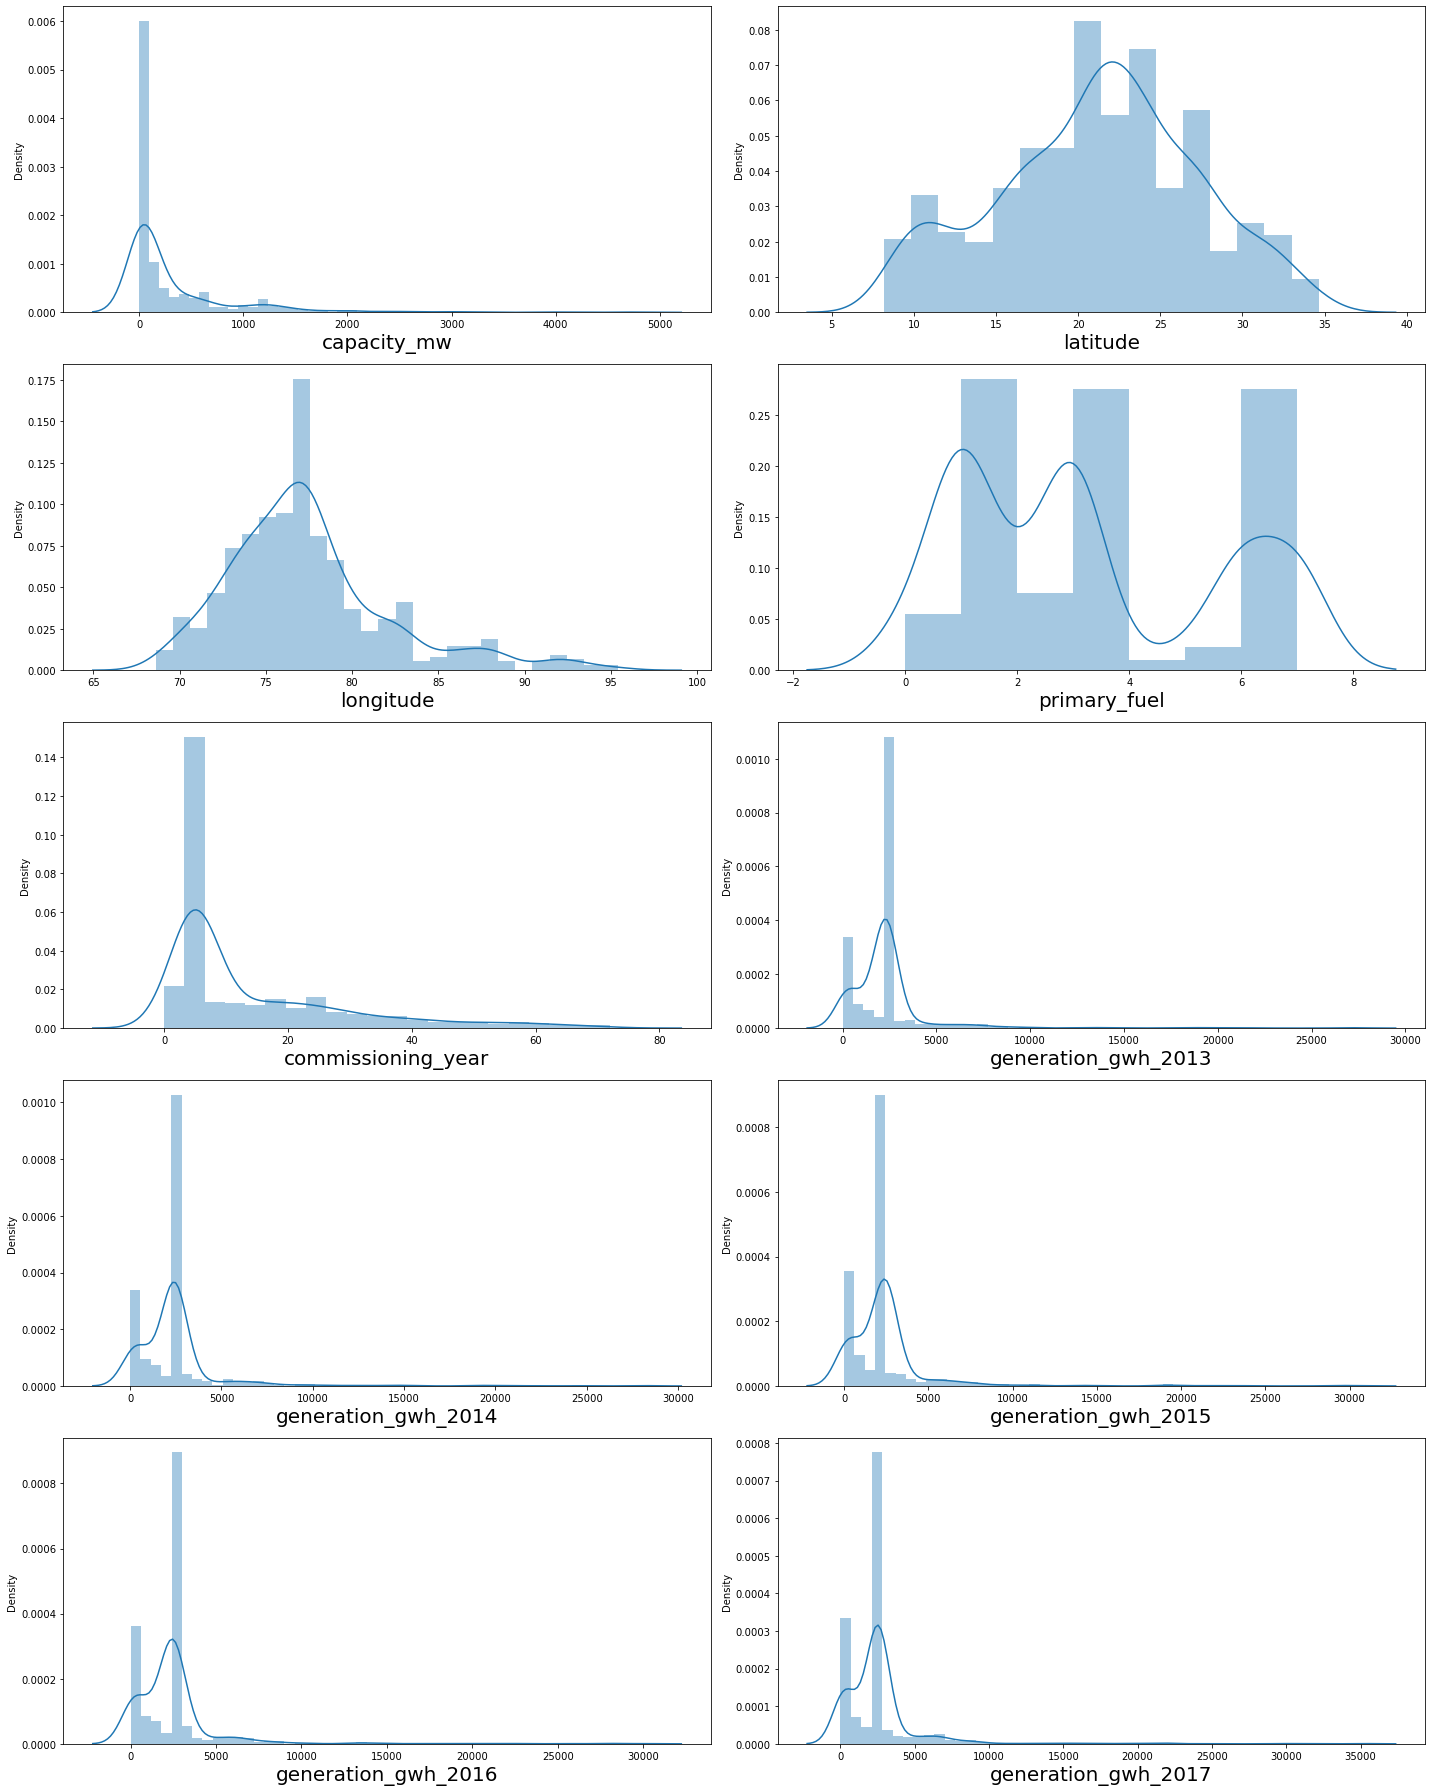

In [33]:
#ploting 
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

* There is a lot of skewness in the dataset
* Need to remove skewness

In [34]:
#removing skewness using log transformation
df['capacity_mw']=np.log(1+df['capacity_mw'])
df['longitude']=np.log(1+df['longitude'])
df['commissioning_year']=np.log(1+df['commissioning_year'])
df['generation_gwh_2013']=np.log(1+df['generation_gwh_2013'])
df['generation_gwh_2014']=np.log(1+df['generation_gwh_2014'])
df['generation_gwh_2015']=np.log(1+df['generation_gwh_2015'])
df['generation_gwh_2016']=np.log(1+df['generation_gwh_2016'])
df['generation_gwh_2017']=np.log(1+df['generation_gwh_2017'])


In [35]:
df.skew()

capacity_mw            0.125029
latitude              -0.147391
longitude              0.924113
primary_fuel           0.471141
commissioning_year     0.531101
generation_gwh_2013   -2.699707
generation_gwh_2014   -2.589757
generation_gwh_2015   -2.311574
generation_gwh_2016   -2.269502
generation_gwh_2017   -2.278767
dtype: float64

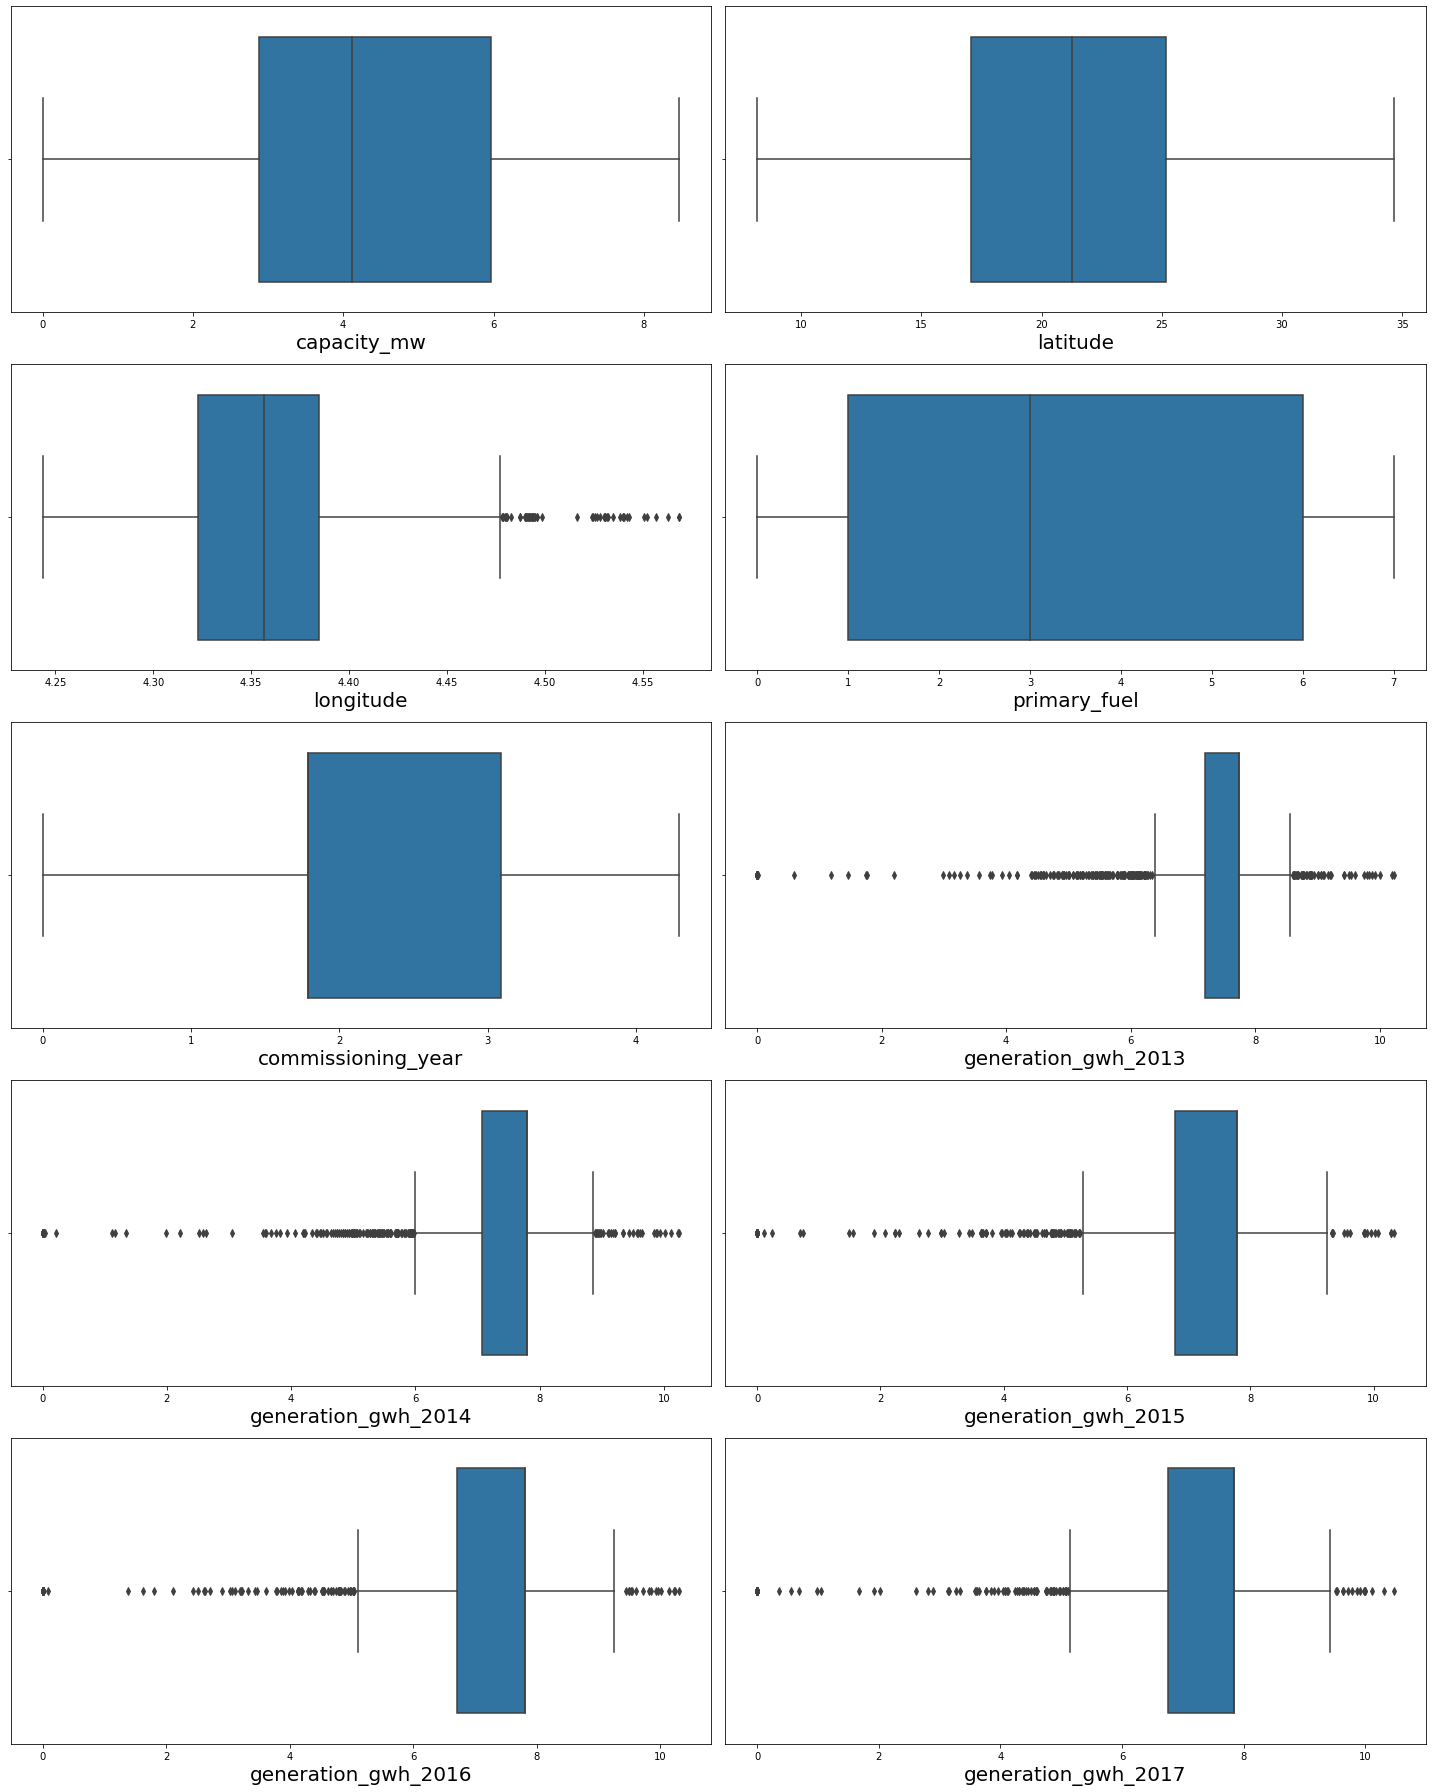

In [36]:
#checking outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [37]:
#importing scipy to remove outliers
from scipy import stats

In [38]:
#removing outliers using z score
z=np.abs(stats.zscore(df))
z

array([[1.6340626 , 1.1483961 , 0.9010043 , ..., 0.39906319, 0.40408601,
        0.40311963],
       [0.16015781, 0.58673028, 0.59249618, ..., 0.39906319, 0.40408601,
        0.40311963],
       [0.32364638, 0.11629242, 1.8047639 , ..., 0.39906319, 0.40408601,
        0.40311963],
       ...,
       [0.54734828, 0.97298691, 0.37669217, ..., 0.39906319, 0.40408601,
        0.40311963],
       [0.05243519, 0.51831341, 0.78603384, ..., 0.39906319, 0.40408601,
        0.40311963],
       [0.77009551, 1.85081984, 0.03638046, ..., 0.39906319, 0.40408601,
        0.40311963]])

In [39]:
print('Row Numbers:',np.where(z>3)[0])

Row Numbers: [ 23  23  39  39  39  58  60  60  60  62  65  65  73  73  73  73  73  87
  87 102 106 107 107 134 161 161 161 169 169 169 169 180 184 205 205 205
 205 205 223 223 223 223 224 224 224 224 238 245 255 255 259 260 260 260
 276 276 276 278 278 313 313 333 333 333 333 333 334 337 341 347 352 354
 359 359 359 359 361 386 386 417 419 421 421 421 421 421 428 436 436 436
 436 436 449 461 469 469 471 478 478 478 478 481 512 520 526 526 526 526
 526 548 548 549 564 566 570 570 570 570 570 577 586 586 586 590 590 591
 602 629 629 638 639 645 647 647 651 651 651 651 651 684 684 684 685 691
 700 724 747 747 747 748 748 748 792 792 792 792 792 796 796 810 814 814
 818 818 818 818 819 823 851 851 862 874 874 902 902 902 903]


In [40]:
#removing outliers some rows
index=(np.where(z>3)[0])
df=df.drop(df.index[index])

In [41]:
#checking head
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.252763,28.1839,4.307313,6,2.079442,7.742862,7.792098,7.789485,7.805856,7.837063
1,4.595120,24.7663,4.325575,1,1.791759,7.742862,7.792098,7.789485,7.805856,7.837063
2,3.693867,21.9038,4.253813,7,1.791759,7.742862,7.792098,7.789485,7.805856,7.837063
3,4.912655,23.8712,4.525696,2,2.708050,6.450120,6.427765,6.739037,6.787850,6.499448
4,7.496097,21.9603,4.423757,1,1.386294,7.420154,8.018477,8.685647,8.739376,8.591666


In [43]:
#checking dataset shape
df.shape

(822, 10)

* There are 822 rows and 10 columns

In [45]:
#spliting feature and label
x=df.drop(columns=['latitude','longitude','capacity_mw',],axis=1)
y=df['capacity_mw']

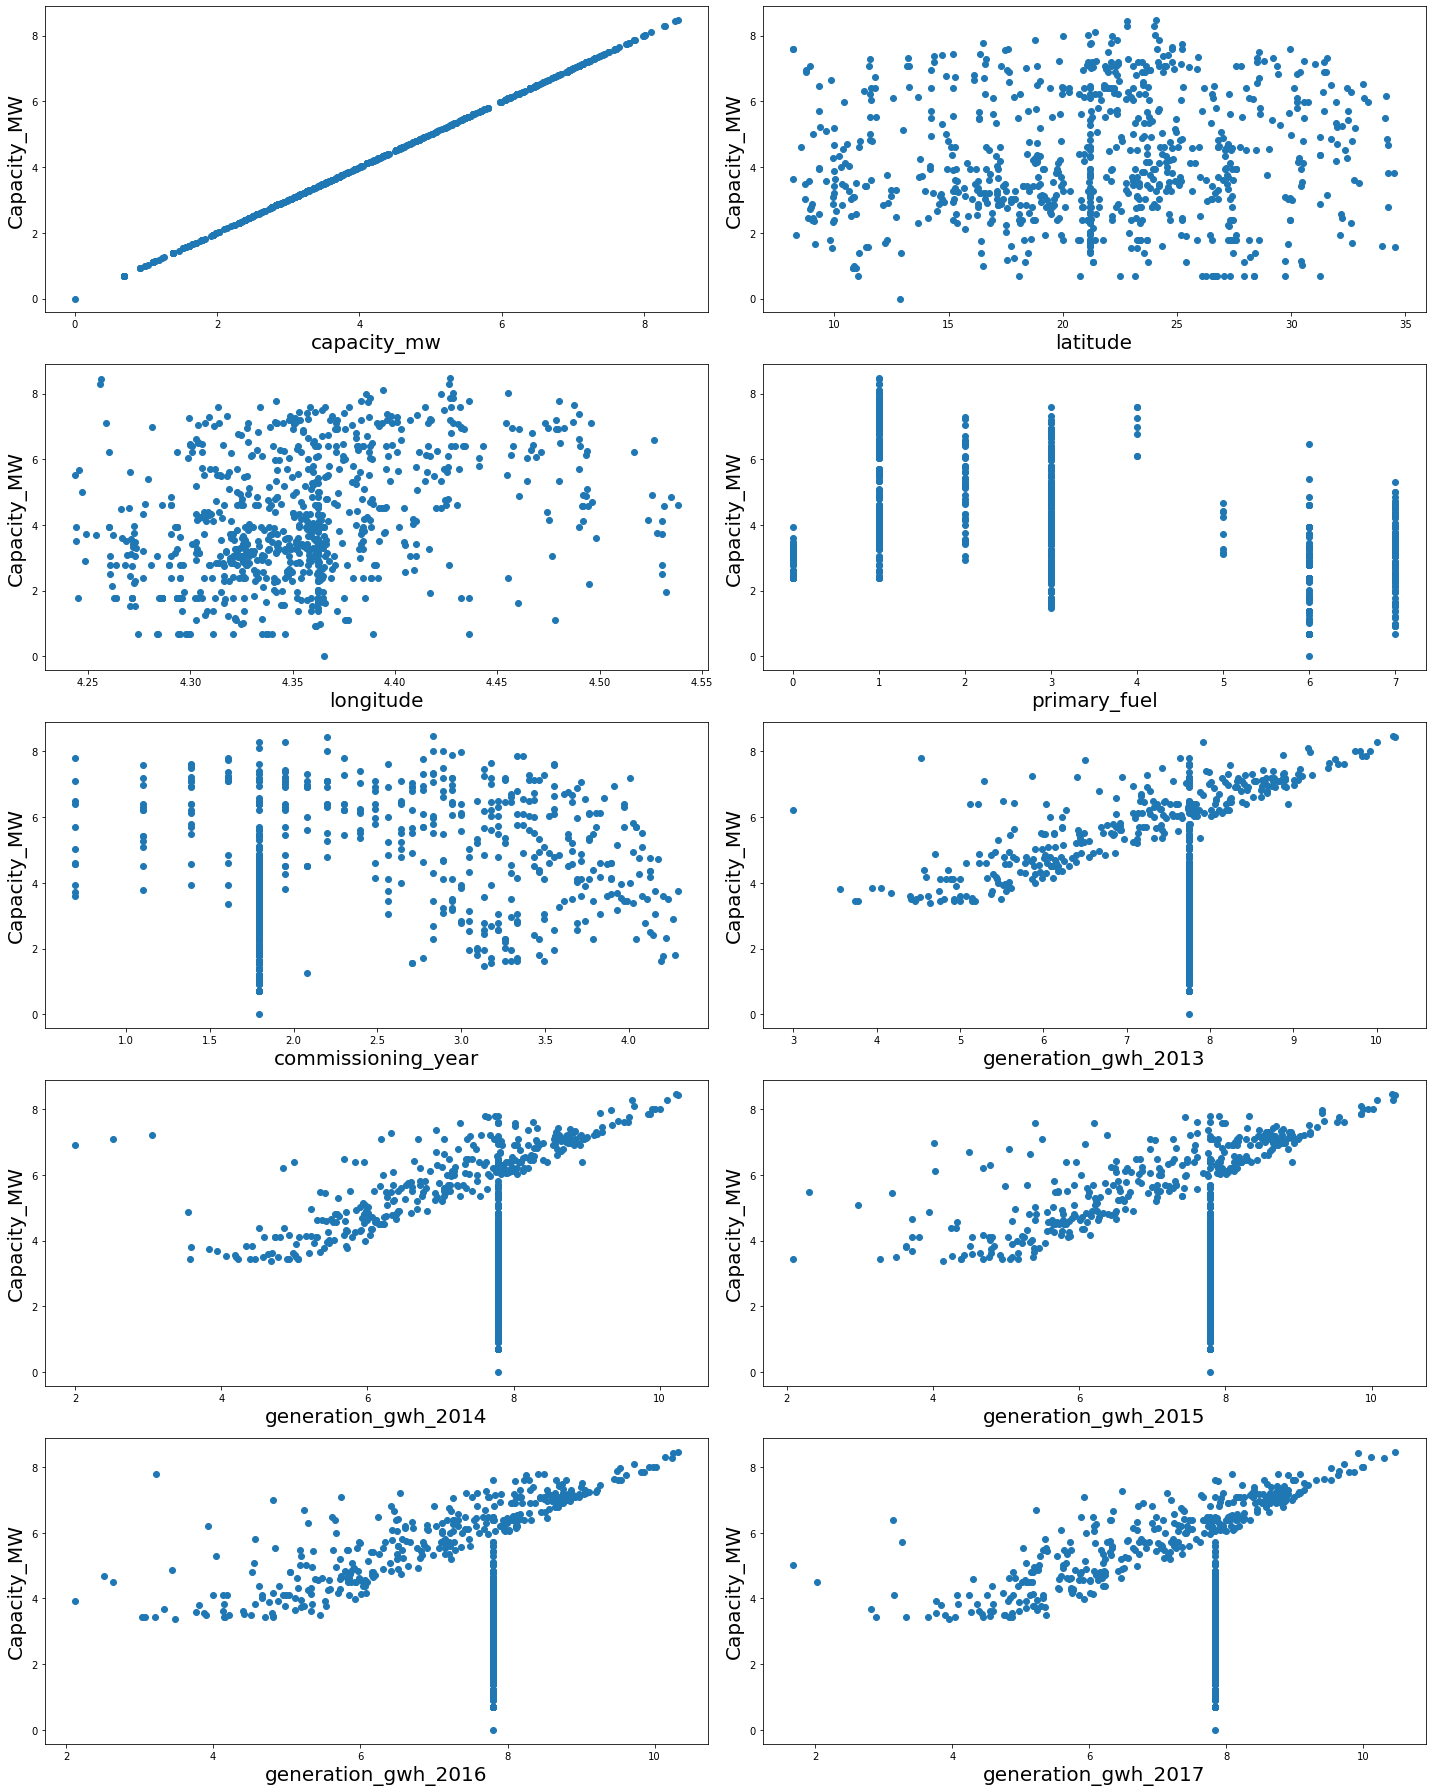

In [47]:
#ploting scatter plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        plt.scatter(df[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Capacity_MW',fontsize=20)
    plotnumber+=1
plt.tight_layout()

* Latitude and Longitude data is not much correlated with the capacity
* Generation with different years is correlated 

In [48]:
#importing preprocessing power transform
from sklearn.preprocessing import power_transform
x=power_transform(x,method=('yeo-johnson'))
x

array([[ 1.11999502, -0.16997203,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [-0.99802111, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [ 1.39308934, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       ...,
       [ 1.39308934, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [-0.99802111, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [ 1.39308934, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877693]])

In [49]:
#importing standerd scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[ 1.11999502, -0.16997203,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [-0.99802111, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [ 1.39308934, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       ...,
       [ 1.39308934, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [-0.99802111, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [ 1.39308934, -0.60448302,  0.20085663, ...,  0.22148351,
         0.2282903 ,  0.23877693]])

### Train Test Split

In [50]:
#importing train test split
from sklearn.model_selection import train_test_split
#spliting data as x and y
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)

## Regression Algorithms 

In [52]:
#Importing regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

## Linear Regression 

In [53]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
#predicting 
y_pred=lr.predict(x_test)

In [55]:
#training score
lr.score(x_train,y_train)

0.2771909043899653

In [56]:
#test score 
lr.score(x_test,y_test)

0.27307431263099435

In [57]:
#cross validation score
scr=cross_val_score(lr,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  25.493182826431752


#### Evaluation metrix

In [58]:
mean_squared_error(y_test,y_pred)

2.5838355780250573

In [59]:
mean_absolute_error(y_test,y_pred)

1.3652703042853216

In [60]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.6074313602841825

## KNeighbors Regressor

In [61]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [62]:
#prediction
y_pred=knn.predict(x_test)

In [63]:
#training score'
knn.score(x_train,y_train)

0.8049730885596484

In [64]:
#testing score
knn.score(x_test,y_test)*100

73.5274954786589

In [65]:
#cross validation score
scr=cross_val_score(knn,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  73.92727347760125


#### Evaluation Metrics

In [66]:
mean_squared_error(y_test,y_pred)

0.9409572424003285

In [67]:
mean_absolute_error(y_test,y_pred)

0.6949072234222136

In [68]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.9700295059431587

## Decision Tree Regressor

In [69]:
DT=DecisionTreeRegressor()
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [70]:
#prediction
y_pred_test=DT.predict(x_test)

In [71]:
#trainging 
DT.score(x_train,y_train)

0.8719286491447421

In [72]:
#testing score
DT.score(x_test,y_test)*100

79.39475090676274

In [73]:
#finding cross val score
scr=cross_val_score(DT,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  80.10537765249724


#### Evaluation Metrics

In [74]:
mean_squared_error(y_test,y_pred)

0.9409572424003285

In [75]:
mean_absolute_error(y_test,y_pred)

0.6949072234222136

In [76]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.9700295059431587

## Random Forest Regressor

In [77]:
Rf=RandomForestRegressor()
Rf.fit(x_train,y_train)

RandomForestRegressor()

In [78]:
#predicting 
y_pred=Rf.predict(x_test)

In [ ]:
#training score
Rf.score(x_train,y_train)

In [79]:
#testing score
Rf.score(x_test,y_test)*100

83.75424459545128

In [80]:
#cheking cross val score
scr=cross_val_score(Rf,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  82.47379398209273


In [81]:
mean_squared_error(y_test,y_pred)

0.5774505088421449

In [82]:
mean_absolute_error(y_test,y_pred)

0.5681421549745324

In [83]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.7599016441896576

## Support Vector Machine

In [84]:
svm=SVR()
svm.fit(x_train,y_train)

SVR()

In [86]:
#predicting 
y_pred=svm.predict(x_test)

In [87]:
#training score
svm.score(x_train,y_train)

0.7344251415933627

In [88]:
#cross validation
np.mean(cross_val_score(svm,x,y,cv=5))

0.7116297369536175

#### Evaluation Metrics

In [89]:
mean_squared_error(y_test,y_pred)

1.113034114468495

In [90]:
mean_absolute_error(y_test,y_pred)

0.7774300549385981

In [91]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.0550043196444718

## Hyper Parameter Tuning

In [92]:
#Hyper Parameter Tuning using GridSearchCV
params={"n_estimators":[20,40,80],"max_features":["auto", "log2"],"min_samples_split":[2,4,8],"bootstrap":[True, False],'max_depth':[5,10,15],'min_samples_leaf':np.arange(2,10)}

In [93]:
grid = GridSearchCV(Rf,param_grid=params,cv=5,n_jobs=-1)

In [94]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [20, 40, 80]})

In [95]:
grid.best_params_

{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 40}

In [96]:
rf=RandomForestRegressor(bootstrap=True,max_depth=10,max_features='log2',min_samples_leaf=2,min_samples_split=4,n_estimators=20)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=20)

In [97]:
#prediction
y_pred_rf=rf.predict(x_test)
y_pred

array([4.90524498, 4.17080173, 3.70252491, 3.23585726, 2.70565569,
       6.11447735, 3.23585726, 5.59982071, 2.67272934, 2.8677765 ,
       2.67272934, 3.0912519 , 3.81402698, 2.67272934, 2.67272934,
       2.70565569, 5.79908696, 3.84628855, 2.70565569, 2.70565569,
       2.76002934, 2.70565569, 5.74219479, 2.67272934, 3.80469137,
       3.81402698, 3.81402698, 2.70565569, 2.83600522, 4.44238202,
       3.04598744, 2.13177929, 7.36752641, 7.60411794, 3.84609873,
       2.9490068 , 3.81402698, 3.77662117, 2.84302786, 2.88211245,
       6.99784514, 2.8918863 , 4.84634574, 4.69037466, 4.13203587,
       2.67272934, 3.81402698, 2.83782099, 3.67868176, 3.23585726,
       2.70565569, 3.84289409, 4.48014209, 5.31360272, 3.23585726,
       6.17985219, 5.63587915, 4.34988068, 2.67272934, 3.81402698,
       3.81402698, 2.67272934, 2.70565569, 3.23585726, 4.89386587,
       2.67272934, 4.84913611, 2.70565569, 5.3651145 , 2.67272934,
       3.71030094, 5.7251556 , 6.48918043, 2.70565569, 3.99803

In [98]:
#training score
rf.score(x_train,y_train)

0.8453941334780706

In [99]:
#testing score
rf.score(x_test,y_test)

0.8375680790884232

In [100]:
#checking cross val score
scr=cross_val_score(rf,x,y,cv=5)
print('Cross validation score: ',scr.mean()*100)

Cross validation score:  82.33327127244124


#### Evaluation Metrics

In [101]:
mean_squared_error(y_test,y_pred_rf)

0.5773593966355952

In [102]:
mean_absolute_error(y_test,y_pred_rf)

0.5773024849404739

In [103]:
np.sqrt(mean_squared_error(y_test,y_pred_rf))

0.759841691825077

* We have almost 84% using Random Forst regressor.

### Saving The Model

In [104]:
import joblib
joblib.dump(rf,'Global Power Capacity MW Prediction.csv')

['Global Power Capacity MW Prediction.csv']

In [105]:
#conclusion
print(y_pred_rf[:15])
print(y_test.values[:15])

[5.02347719 4.30283091 6.33559918 3.09096175 2.93154685 5.83256446
 3.09096175 5.5847963  2.35808148 2.46095257 2.35808148 2.67020453
 3.63186411 2.35808148 2.35808148]
[5.08759634 4.56434819 6.39859493 2.39789527 1.38629436 6.11146734
 2.39789527 5.08140436 3.71357207 1.60943791 0.69314718 3.93182563
 4.83628191 1.79175947 1.79175947]


In [106]:
#predicting the type of fuel
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.252763,28.1839,4.307313,6,2.079442,7.742862,7.792098,7.789485,7.805856,7.837063
1,4.595120,24.7663,4.325575,1,1.791759,7.742862,7.792098,7.789485,7.805856,7.837063
2,3.693867,21.9038,4.253813,7,1.791759,7.742862,7.792098,7.789485,7.805856,7.837063
3,4.912655,23.8712,4.525696,2,2.708050,6.450120,6.427765,6.739037,6.787850,6.499448
4,7.496097,21.9603,4.423757,1,1.386294,7.420154,8.018477,8.685647,8.739376,8.591666


In [107]:
df['primary_fuel'].value_counts()

1    232
3    231
6    126
7    123
0     50
2     43
5     10
4      7
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

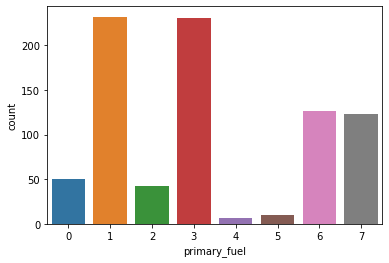

In [111]:
sns.countplot(df['primary_fuel'])

* The usage of coal and gas for genaration of power is more in our country compared to all other renewable resources.

In [113]:
X=df.drop(columns=['primary_fuel'],axis=1)
Y=df['primary_fuel']

In [115]:
X.head()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.252763,28.1839,4.307313,2.079442,7.742862,7.792098,7.789485,7.805856,7.837063
1,4.595120,24.7663,4.325575,1.791759,7.742862,7.792098,7.789485,7.805856,7.837063
2,3.693867,21.9038,4.253813,1.791759,7.742862,7.792098,7.789485,7.805856,7.837063
3,4.912655,23.8712,4.525696,2.708050,6.450120,6.427765,6.739037,6.787850,6.499448
4,7.496097,21.9603,4.423757,1.386294,7.420154,8.018477,8.685647,8.739376,8.591666


In [116]:
X.shape

(822, 9)

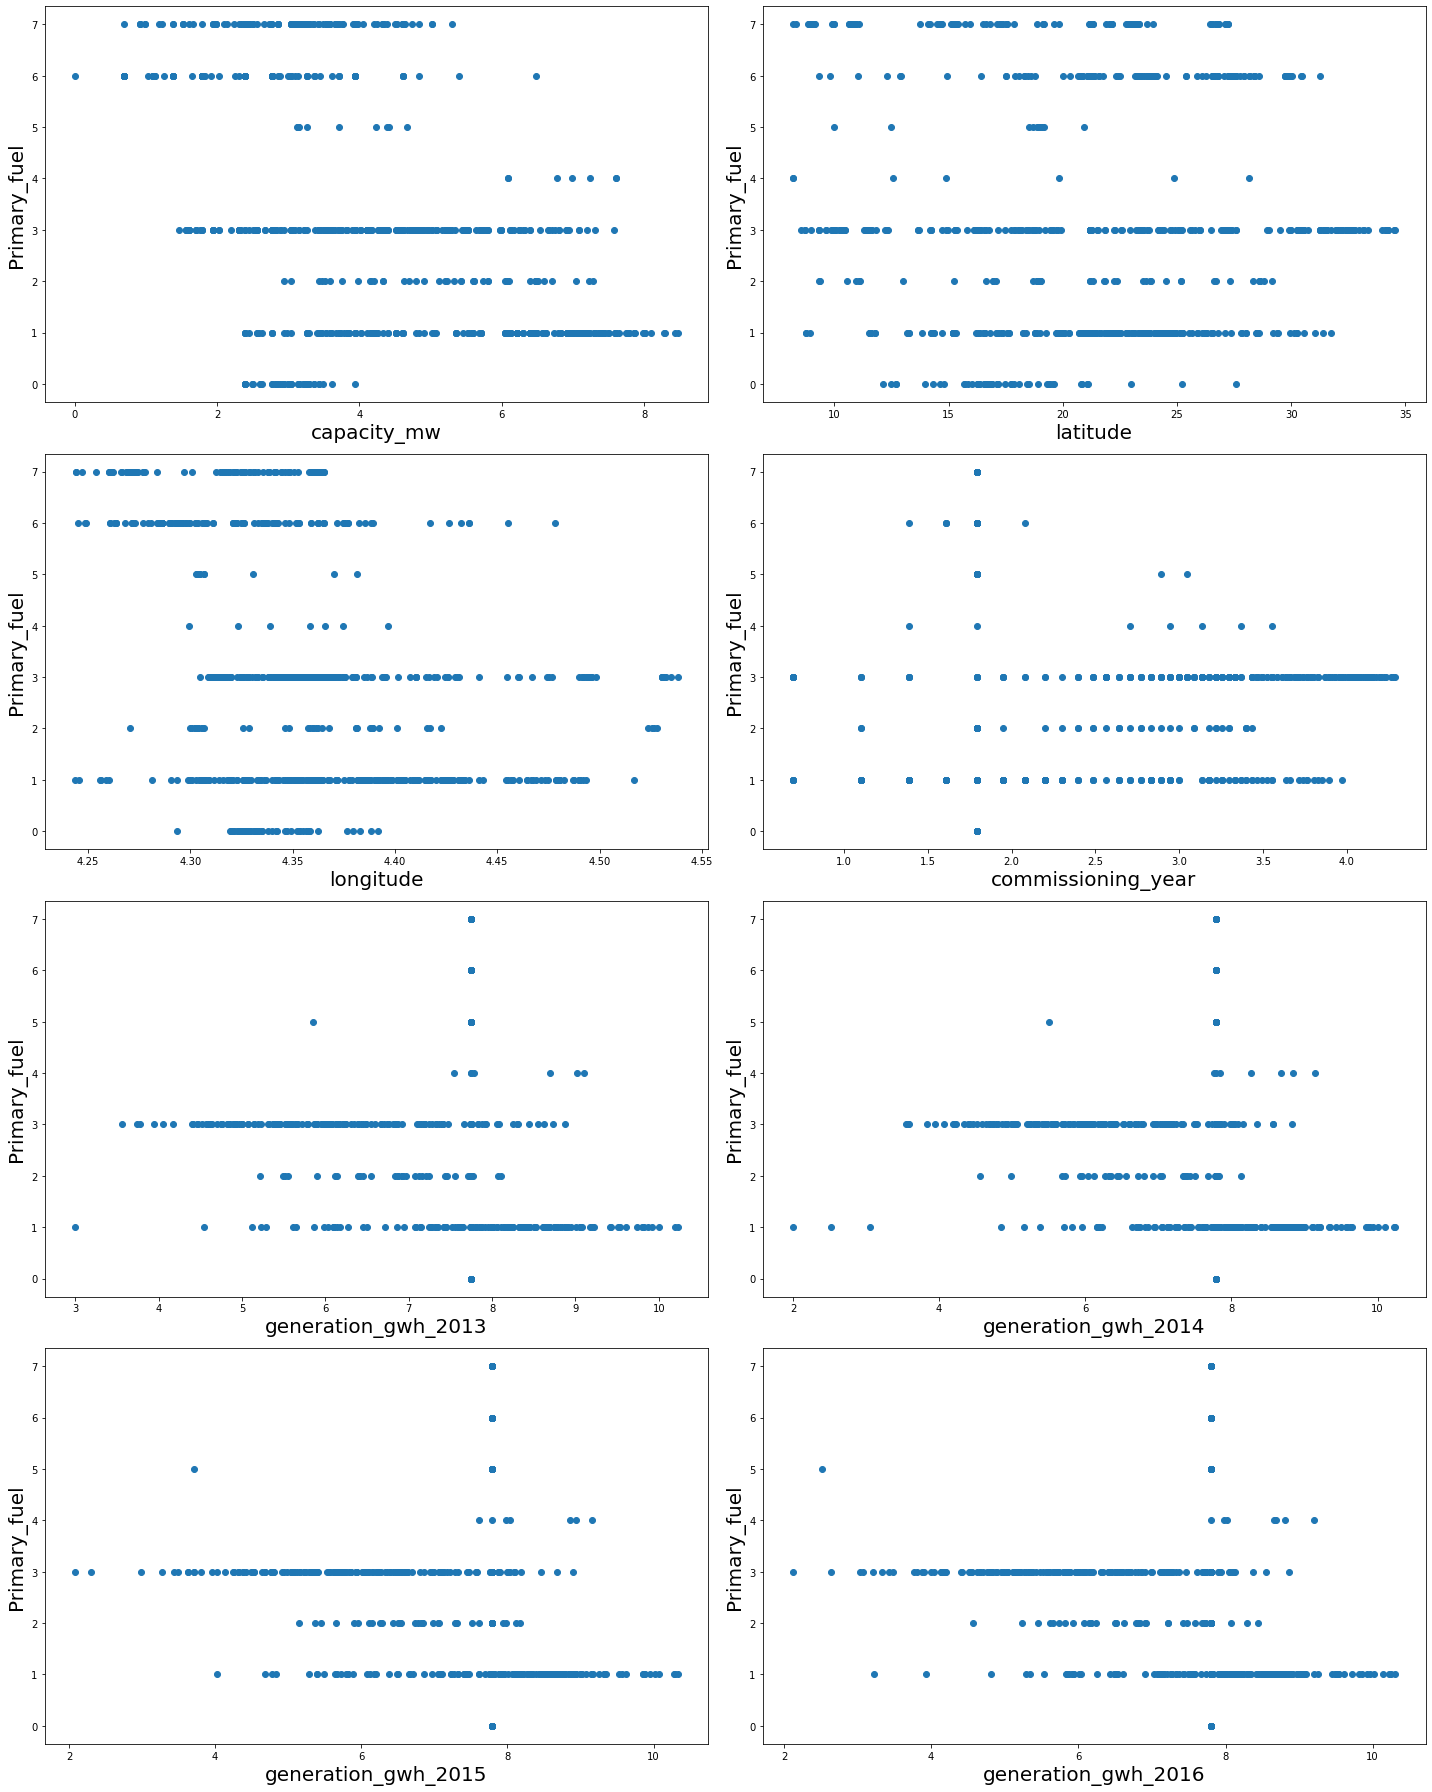

In [117]:
# ploting scatter plot
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=8:
        ax=plt.subplot(4,2,plotnumber)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Primary_fuel',fontsize=20)
    plotnumber+=1
plt.tight_layout()

* There are so many correlation in feature and label
* There is some little correlation with feature and some classes

In [118]:
#importing power transform
from sklearn.preprocessing import power_transform

In [119]:
#removing skewness
X=power_transform(X,method=('yeo-johnson'))
X

array([[-1.71423543,  1.14741733, -0.90865434, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [ 0.2881888 ,  0.56704371, -0.51923105, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [-0.18346561,  0.08879275, -2.25000123, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       ...,
       [-0.41462069, -0.98625097, -0.25961553, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [ 0.18617271,  0.49702632, -0.77884658, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [-0.65460444, -1.81104841,  0.21634627, ...,  0.22148351,
         0.2282903 ,  0.23877693]])

In [120]:
#importing standard scaler
from sklearn.preprocessing import StandardScaler

In [121]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[-1.71423543,  1.14741733, -0.91546588, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [ 0.2881888 ,  0.56704371, -0.52603361, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [-0.18346561,  0.08879275, -2.2568437 , ...,  0.22148351,
         0.2282903 ,  0.23877693],
       ...,
       [-0.41462069, -0.98625097, -0.2664121 , ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [ 0.18617271,  0.49702632, -0.78565512, ...,  0.22148351,
         0.2282903 ,  0.23877693],
       [-0.65460444, -1.81104841,  0.20956067, ...,  0.22148351,
         0.2282903 ,  0.23877693]])

In [122]:
#importing SMOTE
from imblearn.over_sampling import SMOTE

In [123]:
sm=SMOTE()
x_over,y_over=sm.fit_resample(X,Y)
y_over.value_counts()

0    232
1    232
2    232
3    232
4    232
5    232
6    232
7    232
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

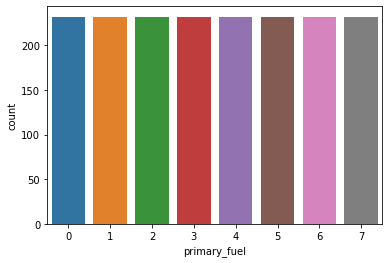

In [124]:
sns.countplot(y_over)

In [125]:
#importing train test split method
from sklearn.model_selection import train_test_split

In [126]:
#spliting dataset
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=50)

## Multi Class Classification Algorithms

In [128]:
#importing requred libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve

## KNeighbors Classifier

In [129]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [130]:
#prediction 
knn_y_pred=knn.predict(x_test)

In [131]:
#training score
knn.score(x_train,y_train)

0.8829869130100076

In [132]:
#testing score
knn.score(x_test,y_test)

0.8545780969479354

In [133]:
accuracy_score(y_test,knn_y_pred)

0.8545780969479354

In [134]:
#cross validation score
np.mean(cross_val_score(knn,x_over,y_over,cv=5))

0.8399791322493696

#### Evaluation Metrics

In [135]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        68
           1       0.83      0.56      0.67        79
           2       0.69      0.87      0.77        55
           3       0.97      0.84      0.90        77
           4       0.80      1.00      0.89        78
           5       0.90      0.94      0.92        66
           6       0.93      0.86      0.89        72
           7       0.90      0.84      0.87        62

    accuracy                           0.85       557
   macro avg       0.86      0.86      0.85       557
weighted avg       0.86      0.85      0.85       557



In [136]:
confusion_matrix(y_test,knn_y_pred)

array([[65,  3,  0,  0,  0,  0,  0,  0],
       [ 4, 44,  9,  1, 19,  1,  0,  1],
       [ 0,  1, 48,  1,  0,  5,  0,  0],
       [ 0,  2,  9, 65,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 78,  0,  0,  0],
       [ 0,  0,  4,  0,  0, 62,  0,  0],
       [ 2,  2,  0,  0,  0,  1, 62,  5],
       [ 4,  1,  0,  0,  0,  0,  5, 52]])

## Decision Tree Classifier

In [137]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [138]:
#prediction
dt_y_pred=dt.predict(x_test)

In [139]:
#training score
dt.score(x_train,y_train)

1.0

In [140]:
#testing score
accuracy_score(y_test,dt_y_pred)

0.8617594254937163

In [141]:
#Cross validation score
np.mean(cross_val_score(dt,x_over,y_over,cv=5))

0.8502289655971944

#### Evaluation Metrics

In [142]:
print(classification_report(y_test,dt_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.75      0.59      0.66        79
           2       0.75      0.95      0.84        55
           3       0.86      0.84      0.85        77
           4       0.88      1.00      0.93        78
           5       0.97      0.89      0.93        66
           6       0.89      0.92      0.90        72
           7       0.88      0.79      0.83        62

    accuracy                           0.86       557
   macro avg       0.86      0.87      0.86       557
weighted avg       0.86      0.86      0.86       557



In [143]:
confusion_matrix(y_test,dt_y_pred)

array([[64,  3,  0,  0,  0,  0,  0,  1],
       [ 3, 47,  7,  7, 10,  0,  3,  2],
       [ 0,  0, 52,  2,  0,  1,  0,  0],
       [ 0,  6,  5, 65,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 78,  0,  0,  0],
       [ 0,  0,  3,  2,  0, 59,  0,  2],
       [ 1,  2,  1,  0,  0,  0, 66,  2],
       [ 1,  5,  1,  0,  1,  0,  5, 49]])

## Random Forest Classifier

In [144]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [145]:
#prediction
rf_y_pred=rf.predict(x_test)
y_pred

array([4.90524498, 4.17080173, 3.70252491, 3.23585726, 2.70565569,
       6.11447735, 3.23585726, 5.59982071, 2.67272934, 2.8677765 ,
       2.67272934, 3.0912519 , 3.81402698, 2.67272934, 2.67272934,
       2.70565569, 5.79908696, 3.84628855, 2.70565569, 2.70565569,
       2.76002934, 2.70565569, 5.74219479, 2.67272934, 3.80469137,
       3.81402698, 3.81402698, 2.70565569, 2.83600522, 4.44238202,
       3.04598744, 2.13177929, 7.36752641, 7.60411794, 3.84609873,
       2.9490068 , 3.81402698, 3.77662117, 2.84302786, 2.88211245,
       6.99784514, 2.8918863 , 4.84634574, 4.69037466, 4.13203587,
       2.67272934, 3.81402698, 2.83782099, 3.67868176, 3.23585726,
       2.70565569, 3.84289409, 4.48014209, 5.31360272, 3.23585726,
       6.17985219, 5.63587915, 4.34988068, 2.67272934, 3.81402698,
       3.81402698, 2.67272934, 2.70565569, 3.23585726, 4.89386587,
       2.67272934, 4.84913611, 2.70565569, 5.3651145 , 2.67272934,
       3.71030094, 5.7251556 , 6.48918043, 2.70565569, 3.99803

In [146]:
#traing score
rf.score(x_train,y_train)

1.0

In [147]:
#testing score
rf.score(x_test,y_test)

0.8922800718132855

In [148]:
accuracy_score(y_test,rf_y_pred)

0.8922800718132855

In [149]:
#cross validation score
np.mean(cross_val_score(rf,x_over,y_over,cv=5))

0.8900921658986174

#### Evaluation Metrics

In [150]:
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.81      0.63      0.71        79
           2       0.81      0.93      0.86        55
           3       0.92      0.91      0.92        77
           4       0.90      1.00      0.95        78
           5       0.93      0.94      0.93        66
           6       0.90      0.96      0.93        72
           7       0.93      0.85      0.89        62

    accuracy                           0.89       557
   macro avg       0.89      0.90      0.89       557
weighted avg       0.89      0.89      0.89       557



In [151]:
confusion_matrix(y_test,rf_y_pred)

array([[64,  3,  0,  0,  0,  0,  0,  1],
       [ 3, 50,  6,  6,  9,  1,  2,  2],
       [ 0,  0, 51,  0,  0,  4,  0,  0],
       [ 0,  5,  2, 70,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 78,  0,  0,  0],
       [ 0,  1,  3,  0,  0, 62,  0,  0],
       [ 1,  0,  1,  0,  0,  0, 69,  1],
       [ 0,  3,  0,  0,  0,  0,  6, 53]])

## Support Vector Classifier

In [152]:
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [153]:
#prediction
svm_y_pred=svm.predict(x_test)

In [154]:
#training score
svm.score(x_train,y_train)

0.7875288683602771

In [155]:
#testing score
accuracy_score(y_test,svm_y_pred)

0.7594254937163375

In [156]:
#cross validation score
np.mean(cross_val_score(svm,x_over,y_over,cv=5))

0.7672434281077009

#### Evaluation Metrics

In [157]:
print(classification_report(y_test,svm_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.90      0.77        68
           1       0.67      0.53      0.59        79
           2       0.78      0.73      0.75        55
           3       0.83      0.84      0.84        77
           4       0.90      1.00      0.95        78
           5       0.75      0.88      0.81        66
           6       0.70      0.67      0.68        72
           7       0.76      0.50      0.60        62

    accuracy                           0.76       557
   macro avg       0.76      0.76      0.75       557
weighted avg       0.76      0.76      0.75       557



In [158]:
confusion_matrix(y_test,svm_y_pred)

array([[61,  0,  0,  0,  0,  1,  6,  0],
       [ 8, 42,  7,  6,  9,  1,  5,  1],
       [ 0,  3, 40,  4,  0,  8,  0,  0],
       [ 0,  9,  3, 65,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 78,  0,  0,  0],
       [ 0,  5,  0,  3,  0, 58,  0,  0],
       [ 6,  3,  1,  0,  0,  5, 48,  9],
       [16,  1,  0,  0,  0,  4, 10, 31]])

## Navie Bayes Gaussian Classifier

In [159]:
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [160]:
nb_y_pred=nb.predict(x_test)

In [161]:
accuracy_score(y_test,nb_y_pred)

0.5278276481149012

In [162]:
np.mean(cross_val_score(nb,x_over,y_over,cv=5))

0.5242544126597688

In [163]:
print(classification_report(y_test,nb_y_pred))

              precision    recall  f1-score   support

           0       0.56      0.85      0.68        68
           1       0.74      0.18      0.29        79
           2       0.59      0.53      0.56        55
           3       0.71      0.69      0.70        77
           4       0.72      0.99      0.83        78
           5       0.53      0.12      0.20        66
           6       0.86      0.08      0.15        72
           7       0.27      0.79      0.40        62

    accuracy                           0.53       557
   macro avg       0.62      0.53      0.48       557
weighted avg       0.63      0.53      0.48       557



In [164]:
confusion_matrix(y_test,nb_y_pred)

array([[58,  0,  0,  0,  0,  0,  0, 10],
       [ 5, 14, 11,  6, 24,  0,  0, 19],
       [ 2,  1, 29, 15,  1,  0,  0,  7],
       [ 0,  3,  9, 53,  5,  7,  0,  0],
       [ 0,  1,  0,  0, 77,  0,  0,  0],
       [24,  0,  0,  1,  0,  8,  1, 32],
       [ 1,  0,  0,  0,  0,  0,  6, 65],
       [13,  0,  0,  0,  0,  0,  0, 49]])

## ROC AUC Score

In [175]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [176]:
import scikitplot as skplt

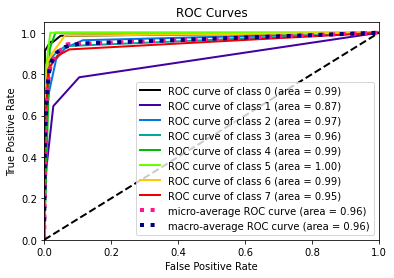

In [177]:
#ploting Roc Auc score
probas=knn.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

* The are under class 1 is compared to all the other classes

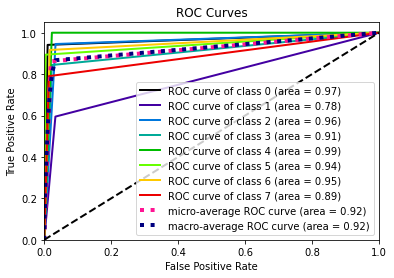

In [178]:
#Decision Tree Random forest
probas=dt.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

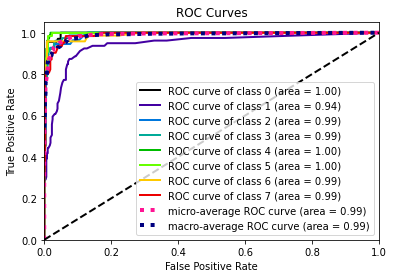

In [179]:
#Random Forest
probas=rf.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

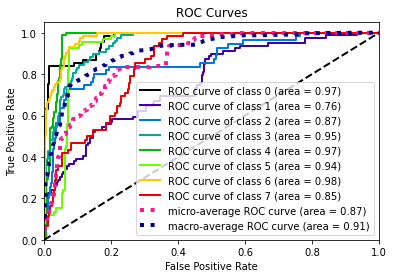

In [180]:
#Navies Bayes
probas=nb.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

* The ROC and AUC score is good for both Random Forest by using any model we can build model

In [181]:
#Randomised Search CV
param_grid={
    'max_depth':[5,10],
    'max_features':['auto','sqrt'],
    'n_estimators':[200,300],
    'criterion':['gini','entropy']
}

In [182]:
random_search=RandomizedSearchCV(rf, param_grid,cv=5,n_jobs=-1)

In [183]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 300]})

In [184]:
random_search.best_params_

{'n_estimators': 300,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [185]:
RF=RandomForestClassifier(n_estimators=300,max_features='auto',max_depth=10,criterion='entropy')
RF.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300)

In [186]:
RF_pred=RF.predict(x_test)
RF_pred

array([3, 0, 0, 7, 2, 5, 6, 1, 5, 6, 3, 7, 6, 2, 1, 0, 2, 6, 0, 6, 5, 1,
       0, 4, 7, 6, 0, 2, 7, 3, 4, 6, 0, 4, 5, 1, 5, 0, 3, 3, 5, 4, 0, 2,
       7, 2, 4, 7, 3, 1, 5, 7, 6, 6, 3, 1, 3, 1, 3, 2, 4, 2, 0, 3, 4, 1,
       7, 4, 2, 2, 4, 4, 3, 1, 3, 3, 0, 0, 0, 3, 6, 7, 7, 2, 3, 4, 0, 3,
       2, 3, 4, 1, 4, 6, 0, 3, 7, 5, 3, 2, 3, 1, 4, 4, 6, 3, 2, 5, 4, 5,
       4, 5, 4, 7, 7, 2, 6, 0, 0, 2, 1, 2, 5, 0, 5, 1, 5, 4, 1, 0, 6, 4,
       0, 0, 7, 2, 3, 7, 6, 5, 2, 5, 1, 1, 6, 3, 3, 2, 5, 5, 6, 2, 4, 2,
       4, 5, 1, 1, 1, 4, 5, 0, 2, 1, 7, 0, 7, 1, 0, 6, 4, 5, 4, 0, 7, 1,
       3, 5, 6, 2, 7, 7, 4, 0, 4, 0, 5, 5, 6, 4, 1, 4, 7, 6, 0, 4, 1, 0,
       0, 0, 0, 3, 6, 5, 5, 0, 5, 7, 5, 4, 3, 2, 6, 0, 4, 5, 1, 4, 2, 5,
       2, 1, 4, 6, 6, 6, 0, 6, 2, 4, 3, 7, 7, 7, 5, 2, 7, 6, 5, 6, 7, 2,
       3, 5, 4, 6, 1, 2, 3, 3, 3, 6, 4, 3, 0, 4, 4, 1, 4, 0, 1, 2, 1, 4,
       0, 4, 0, 6, 6, 3, 7, 6, 4, 4, 4, 5, 3, 7, 7, 3, 4, 4, 3, 3, 6, 1,
       6, 5, 5, 0, 6, 7, 5, 4, 4, 0, 6, 1, 4, 4, 6,

In [187]:
#traing score 
RF.score(x_train,y_train)

0.9630484988452656

In [188]:
#testing 
RF.score(x_test,y_test)

0.8779174147217235

In [189]:
#accuracy
accuracy_score(y_test,RF_pred)

0.8779174147217235

In [190]:
#cross validation 
np.mean(cross_val_score(RF,x_over,y_over,cv=5))

0.8766208735472277

#### Evaluation Metrics

In [191]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.82      0.57      0.67        79
           2       0.84      0.89      0.87        55
           3       0.92      0.91      0.92        77
           4       0.88      1.00      0.93        78
           5       0.90      0.97      0.93        66
           6       0.84      0.94      0.89        72
           7       0.91      0.81      0.85        62

    accuracy                           0.88       557
   macro avg       0.88      0.88      0.87       557
weighted avg       0.88      0.88      0.87       557



In [192]:
confusion_matrix(y_test,RF_pred)

array([[65,  3,  0,  0,  0,  0,  0,  0],
       [ 5, 45,  5,  6, 10,  1,  5,  2],
       [ 0,  0, 49,  0,  0,  6,  0,  0],
       [ 0,  3,  3, 70,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 78,  0,  0,  0],
       [ 0,  1,  1,  0,  0, 64,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 68,  3],
       [ 1,  3,  0,  0,  0,  0,  8, 50]])

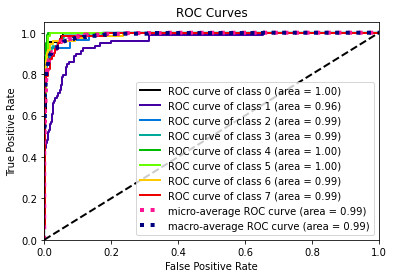

In [193]:
#Random Forest
probas=RF.predict_proba(x_test)
skplt.metrics.plot_roc(y_test,probas)
plt.show()

* most of classes near to ROC score
* area for plotting come one on the other
* The Random Forest classifier score is good
* After hyper parameter tuning there is no imporment

### Model Saving

In [197]:
import pickle
filename='Global power fuel type Prediction.pkl'
pickle.dump(RF,open(filename,'wb'))

In [198]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
RF_y_pred=RF.predict(x_test)
preds=RF.predict(x_test)
print(preds)
print(y_test.values)

[3 0 0 7 2 5 1 6 5 6 3 7 6 2 1 0 2 6 0 6 5 1 0 4 7 7 0 2 7 3 4 6 0 4 5 1 5
 0 3 3 5 4 0 2 7 2 4 7 3 1 5 7 6 6 3 1 3 1 3 2 4 2 0 3 4 1 7 4 2 2 4 4 3 1
 3 1 0 0 0 3 6 7 7 2 3 4 0 3 2 3 4 1 4 6 0 3 7 5 3 2 3 1 4 4 6 3 2 5 4 5 4
 5 4 7 7 2 6 0 0 2 1 2 5 0 2 1 5 4 1 0 6 4 0 0 7 2 3 7 6 5 2 2 1 1 6 3 3 2
 5 5 6 2 4 2 4 5 1 1 1 4 5 0 2 1 7 0 7 1 0 6 4 5 4 0 7 1 3 5 6 2 7 7 4 0 4
 0 5 5 7 4 1 4 7 6 0 4 1 0 0 7 0 3 6 5 5 0 5 7 5 4 3 2 6 0 4 5 1 4 2 5 2 1
 4 6 6 6 0 6 2 4 3 7 7 7 2 2 7 6 5 6 7 2 3 5 4 1 1 2 3 3 3 6 4 3 0 4 4 2 4
 0 1 2 1 4 1 1 0 6 6 2 7 6 4 4 4 5 3 7 7 3 4 4 3 3 6 1 6 5 5 0 6 7 5 4 4 0
 6 1 4 4 6 6 5 7 5 3 2 6 7 6 4 7 7 5 2 6 5 1 5 1 7 3 0 3 2 4 6 0 3 6 5 3 7
 1 2 7 5 1 0 5 2 2 5 2 4 1 6 5 0 3 7 4 0 0 5 6 0 0 4 0 4 4 6 3 3 6 1 2 1 6
 4 5 0 5 4 6 7 3 1 1 6 3 2 6 5 6 3 4 1 4 1 0 4 6 4 4 3 6 4 0 7 2 7 0 2 3 0
 0 4 2 1 5 3 0 3 4 6 4 6 3 3 2 4 1 7 2 3 5 4 6 2 2 4 0 6 1 1 1 0 3 7 7 6 3
 3 5 3 2 0 6 1 6 2 6 4 4 1 6 5 3 3 6 1 4 4 5 1 4 5 5 4 2 3 1 2 0 7 7 3 3 5
 5 3 7 2 2 6 6 4 6 4 7 4 

* We have accuracy score of 87% in predicting the fuel type.